#**Actividad 8: Uso de software para búsqueda**
# **ADRIAN MORAN ALVAREZ IMTC N1**

## **1-Cargar librerías**

In [1]:
# Cargar librerías
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score


## **2-Cargar datos**

In [2]:
# Cargar datos
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## **3-Preprocesamiento de datos**

In [3]:
# Normalizar los datos dividiendo entre 255 (ya que los valores de píxeles están entre 0 y 255)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Convertir las etiquetas a categóricas (one-hot encoding)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


## **4-Selección y entrenamiento del modelo**

In [4]:
# Selección y construcción del modelo
model = Sequential([
    Flatten(input_shape=(28, 28)),          # Convertir cada imagen de 28x28 a un vector plano
    Dense(128, activation='relu'),           # Capa oculta con 128 neuronas y activación ReLU
    Dense(64, activation='relu'),            # Otra capa oculta con 64 neuronas y activación ReLU
    Dense(10, activation='softmax')          # Capa de salida con 10 neuronas (una para cada dígito) y activación softmax
])

# Compilar el modelo
model.compile(optimizer=Adam(),             # Optimizador Adam
              loss='categorical_crossentropy', # Función de pérdida
              metrics=['accuracy'])          # Métrica de evaluación

# Entrenamiento del modelo
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8634 - loss: 0.4654 - val_accuracy: 0.9613 - val_loss: 0.1334
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9661 - loss: 0.1144 - val_accuracy: 0.9640 - val_loss: 0.1161
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9774 - loss: 0.0761 - val_accuracy: 0.9699 - val_loss: 0.1005
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9834 - loss: 0.0527 - val_accuracy: 0.9710 - val_loss: 0.0967
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9873 - loss: 0.0395 - val_accuracy: 0.9692 - val_loss: 0.1055
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9898 - loss: 0.0334 - val_accuracy: 0.9714 - val_loss: 0.1045
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9911 - loss: 0.0285 - val_accuracy: 0.9745 - val_loss: 0.1042
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9925 - loss: 0.0232 - 

## **5-Prueba del modelo**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9743 - loss: 0.1051

Exactitud en el conjunto de prueba: 97.75%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


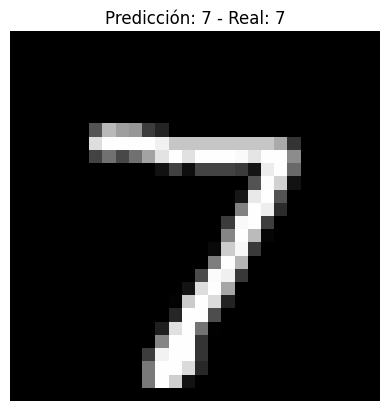

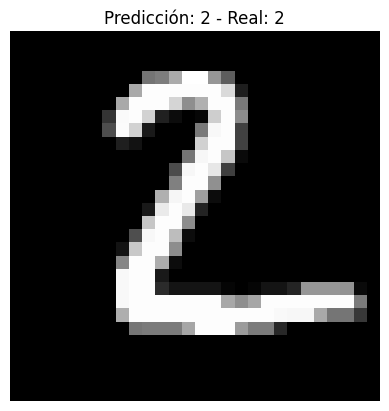

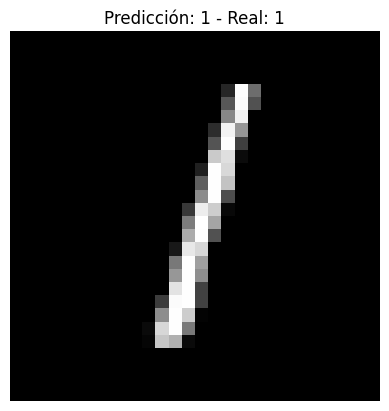

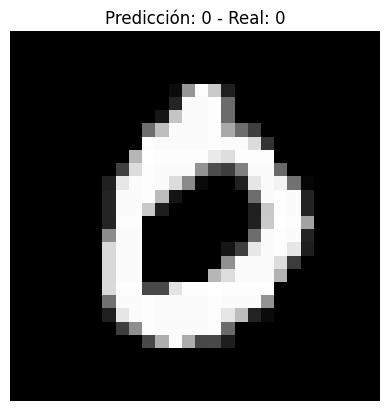

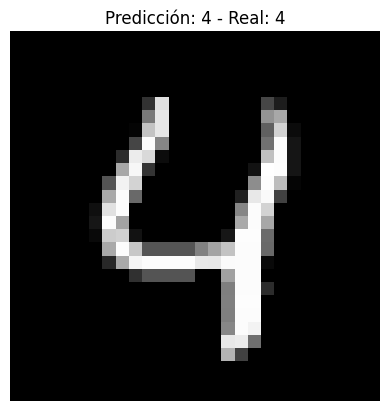

In [5]:
# Evaluar el modelo
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'\nExactitud en el conjunto de prueba: {test_accuracy * 100:.2f}%')

# Realizar predicciones en 5 ejemplos de prueba
predicciones = model.predict(test_data[:5])
predicciones = np.argmax(predicciones, axis=1)  # Obtener la predicción de mayor probabilidad
etiquetas_reales = np.argmax(test_labels[:5], axis=1)  # Obtener etiquetas reales

# Mostrar resultados de predicciones
for i in range(5):
    plt.imshow(test_data[i], cmap='gray')
    plt.title(f'Predicción: {predicciones[i]} - Real: {etiquetas_reales[i]}')
    plt.axis('off')
    plt.show()
